In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
df = pd.read_csv("PatientInfo.csv")

#I'm going to create a set of graphs to analize cases of COVID-19 in S.Korea by  April 1st 2020 by age, sex and health condition

df.head(5)

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [11]:
df_all = df[["sex", "age", "country", "province", "city", "infection_case", "confirmed_date", "released_date", "state"]]
df_all.head(5)

,sex,age,country,province,city,infection_case,confirmed_date,released_date,state
0,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,2020-01-23,2020-02-05,released
1,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,2020-01-30,2020-03-02,released
2,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2020-01-30,2020-02-19,released
3,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,2020-01-30,2020-02-15,released
4,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,2020-01-31,2020-02-24,released


In [12]:
df_sex = df_all['sex'].value_counts().rename_axis('sex').reset_index(name='amount')
df_sex

 

,sex,amount
0,female,1547
1,male,1218


In [13]:
df_age = df_all['age'].value_counts().rename_axis('age').reset_index(name='amount')

from natsort import index_natsorted, order_by_index
df_age = df_age.reindex(index=order_by_index(df_age.index, index_natsorted(df_age['age'], reverse=False)))

df_age

,age,amount
9,0s,38
7,10s,115
0,20s,651
3,30s,351
2,40s,399
1,50s,522
4,60s,335
5,70s,165
6,80s,138
8,90s,43


In [14]:
df_state = df_all['state'].value_counts().rename_axis('state').reset_index(name='amount')
df_state

,state,amount
0,isolated,1839
1,released,879
2,deceased,53


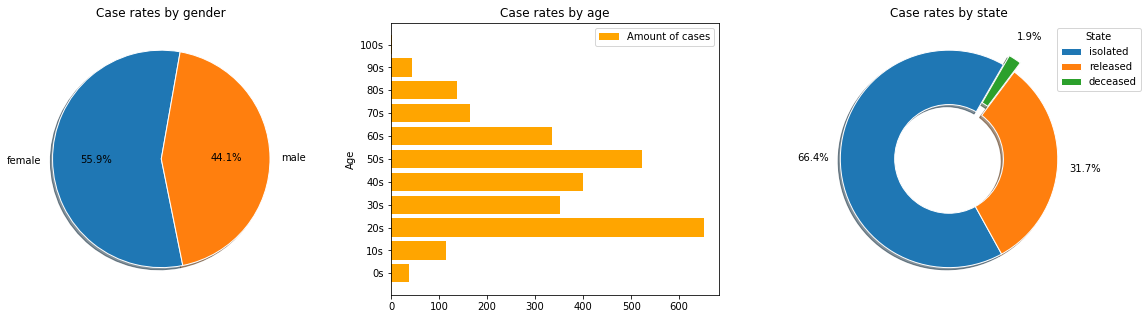

In [15]:
import matplotlib.ticker as ticker

fig = plt.figure()

ax_1 = fig.add_subplot(1, 3, 1)       # number of graph's columns and rows
ax_2 = fig.add_subplot(1, 3, 2)
ax_3 = fig.add_subplot(1, 3, 3)

fig.set_figwidth(20)            #figure's size
fig.set_figheight(5)



plt.axis('equal');            # graph 'Case rates by gender'
sex_data = df_sex["sex"]
amount_data = df_sex["amount"]

ax_1.pie(amount_data, labels = sex_data, autopct='%1.1f%%', shadow=True, startangle=80,  wedgeprops=dict(edgecolor ="w"))

ax_1.set_title('Case rates by gender')

plt.savefig("C:\\ProgramData\\Anaconda3\\Scripts\\study\\South Korea 30-03\\case_by_gender.jpg",
             pad_inches = 10, transparent = True)



import numpy as np            # graph 'Case rates by age'
age_data = df_age["age"]
amount_of_cases = df_age["amount"]
xpos = np.arange(len(age_data))

ax_2.barh(xpos, amount_of_cases, label = 'Amount of cases', color = "orange")

ax_2.set_yticks(xpos)
ax_2.set_yticklabels(age_data)
ax_2.set_ylabel('Age')
ax_2.legend( loc='best') 
ax_2.set_title('Case rates by age')

plt.savefig("C:\\ProgramData\\Anaconda3\\Scripts\\study\\South Korea 30-03\\case_by_age.jpg",
             pad_inches = 10, transparent = True)



vals = df_state["amount"]           # graph 'Case rates by state'
labels_state = df_state["state"]
size = 0.5
explode = [0, 0, 0.1]

ax_3.pie(vals, wedgeprops=dict(width= size, edgecolor ="w"), 
        autopct='%0.1f%%', pctdistance=1.25, explode = explode,
        shadow=True, startangle=60)

ax_3.legend(labels_state, title="State",
          loc="best", bbox_to_anchor=(0.6, 0, 0.5, 1))

ax_3.set_title('Case rates by state')


plt.show()




